<a href="https://colab.research.google.com/github/ybenabed/supervied_learning_MLDS2021/blob/main/papers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

In [ ]:
%%capture
! gdown https://drive.google.com/uc?id=1P4P90pb2JhMF1VjAqLmI9M2OyUzXzn2f
! gdown https://drive.google.com/uc?id=1Xr26j1CcYHCxwQpNytDt7z6YbW4Qvx3q
! gdown https://drive.google.com/uc?id=1xhjWvPp38-q6Lf8aMIbltBYOrcU4T4pt

## Chagement de donnees

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import sparse

Dans cette partie on va charger les données des différents jeux de données et construire les matrice $M = D^{-1} W X$ correspondantes.

$D$ étant une matrice diagonale, son inverse $D^{-1}$ est la matrice diagonale ayant dans chaque élément de la diagonal l'inverse de la matrice $D$. Cette proposition nous aide vraiement à réduire le temps et la mémoire nécessaire pour calculer les inverses des matrices surtouts dans le cas de PubMed où $D$ est de dimension $(19717, 19717)$.

In [ ]:
# Citeseer Dataset
citeseer_mat = loadmat('citeseer.mat')
citeseer_X = citeseer_mat['fea']
citeseer_W = citeseer_mat['W']
citeseer_D_inv = np.identity(citeseer_W.shape[0]) * (1 / citeseer_W.sum(axis = 1))
citeseer_M = (citeseer_D_inv.dot(citeseer_W)).dot(citeseer_X)
citeseer_labels = citeseer_mat['gnd']
citeseer_X.shape, citeseer_W.shape, citeseer_labels.shape, citeseer_M.shape

((3327, 3703), (3327, 3327), (3327, 1), (3327, 3703))

In [ ]:
# Cora Dataset
cora_mat = loadmat('cora.mat')
cora_X = cora_mat['fea']
cora_W = cora_mat['W']
cora_D_inv = np.identity(cora_W.shape[0]) * (1 / cora_W.sum(axis = 1))
cora_M = (cora_D_inv.dot(cora_W)).dot(cora_X)
cora_labels = cora_mat['gnd']
cora_X.shape, cora_W.shape, cora_labels.shape, cora_M.shape

((2708, 1433), (2708, 2708), (2708, 1), (2708, 1433))

In [ ]:
# PubMed Dataset
pubmed_mat = loadmat('pubmed.mat')
pubmed_X = pubmed_mat['fea']
pubmed_W = pubmed_mat['W']
pubmed_D_inv = np.identity(pubmed_W.shape[0]) * (1 / pubmed_W.toarray().sum(axis=1))
pubmed_M = sparse.csr_matrix(pubmed_D_inv).dot(sparse.csr_matrix(pubmed_W)).dot(pubmed_X)
pubmed_labels = pubmed_mat['gnd']
pubmed_X.shape, pubmed_W.shape, pubmed_labels.shape, pubmed_M.shape

((19717, 500), (19717, 19717), (19717, 1), (19717, 500))

On explorer dans ce qui suit le partitionnement des classes dans les différents jeu de données qu'on a.

Il s'avère que le dataset citeseer contient des éléments un peu plus équilibrés, ayant seulement une classe en infériorité flagrante, les autres classes varient entre 15% et 20%. 

On suppose que l'opération de balancement de données n'aura pas grand effet sur ce jeu de données pour les méthodes SMOTE et CC, mais avec SMOTEENN on peut voir des amélirations qui se justifient beaucoup plus par le fait de l'augmentation de données et non pas le balancement .

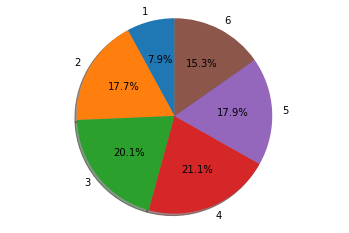

In [ ]:
sizes = [np.count_nonzero(citeseer_labels == label) for label in np.unique(citeseer_labels)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=np.unique(citeseer_labels), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Par contre dans le jeu de données Cora, on peut remarquer des déséquilibres dans le partitionnement des classes, mais on garde toujours un certain nombre de classes dont les partitions se reprochent.

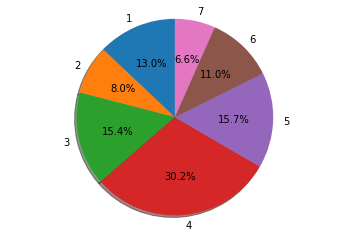

In [ ]:
sizes = [np.count_nonzero(cora_labels == label) for label in np.unique(cora_labels)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=np.unique(cora_labels), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

De même pour le jeu de données PubMed, où on remarque deux classes presquen égale en terme de partitionnement, et une classe qui leur est inférieure.

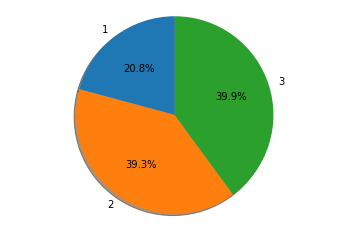

In [ ]:
sizes = [np.count_nonzero(pubmed_labels == label) for label in np.unique(pubmed_labels)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=np.unique(pubmed_labels), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Data Preprocessing

### Balancer les données

Comme les données balancées ont été déjà enregistrés dans des fichiers, on peut les récupérer directement sans avoir besoin de tout réexécuter pour faire le balancement.

Rappelons qu'on a trois famille de méthodes qui assurent le balancement des données, Over Balancing avec SMOTE, Under Balancing avec Cluster Centroids, et la combinaison des deux avec SMOTEENN.

In [ ]:
citeseer_X_cc = np.load('./drive/MyDrive/TMP/appSup/citeseer_X_cc.npy')
citeseer_labels_cc = np.load('./drive/MyDrive/TMP/appSup/citeseer_labels_cc.npy')
citeseer_M_cc = np.load('./drive/MyDrive/TMP/appSup/citeseer_M_cc.npy')
citeseer_labels_Mcc = np.load('./drive/MyDrive/TMP/appSup/citeseer_labels_Mcc.npy')
cora_X_cc = np.load('./drive/MyDrive/TMP/appSup/cora_X_cc.npy')
cora_labels_cc = np.load('./drive/MyDrive/TMP/appSup/cora_labels_cc.npy')
cora_M_cc = np.load('./drive/MyDrive/TMP/appSup/cora_M_cc.npy')
cora_labels_Mcc = np.load('./drive/MyDrive/TMP/appSup/cora_labels_Mcc.npy')
pubmed_X_cc = np.load('./drive/MyDrive/TMP/appSup/pubmed_X_cc.npy')
pubmed_labels_cc = np.load('./drive/MyDrive/TMP/appSup/pubmed_labels_cc.npy')
pubmed_M_cc = np.load('./drive/MyDrive/TMP/appSup/pubmed_M_cc.npy')
pubmed_labels_Mcc = np.load('./drive/MyDrive/TMP/appSup/pubmed_labels_Mcc.npy')

Sinon on peut rééexuter les cellules suivantes:

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

In [ ]:
smoteImbOver = SMOTE()

citeseer_X_smote, citeseer_labels_smote = smoteImbOver.fit_resample(citeseer_X, citeseer_labels)
citeseer_M_smote, citeseer_labels_Msmote = smoteImbOver.fit_resample(citeseer_M, citeseer_labels)

cora_X_smote, cora_labels_smote = smoteImbOver.fit_resample(cora_X, cora_labels)
cora_M_smote, cora_labels_Msmote = smoteImbOver.fit_resample(cora_M, cora_labels)

pubmed_X_smote, pubmed_labels_smote = smoteImbOver.fit_resample(pubmed_X, pubmed_labels)
pubmed_M_smote, pubmed_labels_Msmote = smoteImbOver.fit_resample(pubmed_M, pubmed_labels)

(citeseer_X_smote.shape ,citeseer_labels_smote.shape), (cora_X_smote.shape ,cora_labels_smote.shape), (pubmed_X_smote.shape ,pubmed_labels_smote.shape)

(((4206, 3703), (4206,)), ((5726, 1433), (5726,)), ((23625, 500), (23625,)))

In [ ]:
ccImbUnder = ClusterCentroids(random_state=42)

citeseer_X_cc, citeseer_labels_cc = ccImbUnder.fit_resample(citeseer_X, citeseer_labels)
citeseer_M_cc, citeseer_labels_Mcc = ccImbUnder.fit_resample(citeseer_M, citeseer_labels)

cora_X_cc, cora_labels_cc = ccImbUnder.fit_resample(cora_X, cora_labels)
cora_M_cc, cora_labels_Mcc = ccImbUnder.fit_resample(cora_M, cora_labels)

pubmed_X_cc, pubmed_labels_cc = ccImbUnder.fit_resample(pubmed_X, pubmed_labels)
pubmed_M_cc, pubmed_labels_Mcc = ccImbUnder.fit_resample(pubmed_M, pubmed_labels)

(citeseer_X_cc.shape ,citeseer_labels_cc.shape), (cora_X_cc.shape ,cora_labels_cc.shape), (pubmed_X_cc.shape ,pubmed_labels_cc.shape)

(((1584, 3703), (1584,)), ((1260, 1433), (1260,)), ((12309, 500), (12309,)))

In [ ]:
smoteImbCombine = SMOTEENN()

citeseer_X_smoteenn, citeseer_labels_smoteenn = smoteImbCombine.fit_resample(citeseer_X, citeseer_labels)
citeseer_M_smoteenn, citeseer_labels_Msmoteenn = smoteImbCombine.fit_resample(citeseer_M, citeseer_labels)

cora_X_smoteenn, cora_labels_smoteenn = smoteImbCombine.fit_resample(cora_X, cora_labels)
cora_M_smoteenn, cora_labels_Msmoteenn = smoteImbCombine.fit_resample(cora_M, cora_labels)

pubmed_X_smoteenn, pubmed_labels_smoteenn = smoteImbCombine.fit_resample(pubmed_X, pubmed_labels)
pubmed_M_smoteenn, pubmed_labels_Msmoteenn = smoteImbCombine.fit_resample(pubmed_M, pubmed_labels)

(citeseer_X_smoteenn.shape ,citeseer_labels_smoteenn.shape), (cora_X_smoteenn.shape ,cora_labels_smoteenn.shape), (pubmed_X_smoteenn.shape ,pubmed_labels_smoteenn.shape)

(((627, 3703), (627,)), ((1750, 1433), (1750,)), ((14338, 500), (14338,)))

In [ ]:
np.save('./drive/MyDrive/TMP/appSup/citeseer_X_smoteenn.npy', citeseer_X_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/citeseer_labels_smoteenn.npy', citeseer_labels_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/citeseer_M_smoteenn.npy', citeseer_M_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/citeseer_labels_Msmoteenn.npy', citeseer_labels_Msmoteenn)
np.save('./drive/MyDrive/TMP/appSup/cora_X_smoteenn.npy', cora_X_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/cora_labels_smoteenn.npy', cora_labels_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/cora_M_smoteenn.npy', cora_M_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/cora_labels_Msmoteenn.npy', cora_labels_Msmoteenn)
np.save('./drive/MyDrive/TMP/appSup/pubmed_X_smoteenn.npy', pubmed_X_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/pubmed_labels_smoteenn.npy', pubmed_labels_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/pubmed_M_smoteenn.npy', pubmed_M_smoteenn)
np.save('./drive/MyDrive/TMP/appSup/pubmed_labels_Msmoteenn.npy', pubmed_labels_Msmoteenn)

## Classification

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
from sklearn.model_selection import train_test_split

### CiteSeer

#### Avec la matrice de données X (fea)

In [ ]:
%%capture
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(citeseer_X, citeseer_labels, test_size=0.15)
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(citeseer_X_smote, citeseer_labels_smote, test_size=0.15)
X_cc_train, X_cc_test, Y_cc_train, Y_cc_test = train_test_split(citeseer_X_cc, citeseer_labels_cc, test_size=0.15)
X_smoteenn_train, X_smoteenn_test, Y_smoteenn_train, Y_smoteenn_test = train_test_split(citeseer_X_smoteenn, citeseer_labels_smoteenn, test_size=0.15)
methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)

  model.fit(X_data_train, Y_data_train)
  cv_results_original_train = cross_val_score(model, X_data_train, Y_data_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, X_data_test, Y_data_test, cv=kfold, scoring='accuracy')

  model.fit(X_smote_train, Y_smote_train)
  cv_results_smote_train = cross_val_score(model, X_smote_train, Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, X_smote_test, Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(X_cc_train, Y_cc_train)
  cv_results_cc_train = cross_val_score(model, X_cc_train, Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, X_cc_test, Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(X_smoteenn_train, Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, X_smoteenn_train, Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, X_smoteenn_test, Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [ ]:
citeseer_X_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')
citeseer_X_results

mean       max       std
LR   original train  0.726566  0.756184  0.025185
              test   0.644000  0.720000  0.061188
     smote    train  0.762248  0.782123  0.020409
              test   0.629291  0.714286  0.057998
     cc       train  0.664135  0.733333  0.031353
              test   0.646377  0.791667  0.127124
     smoteenn train  0.881481  0.924528  0.036094
              test   0.745556  1.000000  0.107088
LDA  original train  0.426261  0.475177  0.033358
              test   0.462000  0.580000  0.067794
     smote    train  0.411748  0.456583  0.028284
              test   0.351935  0.507937  0.085189
     cc       train  0.421913  0.481481  0.045841
              test   0.402717  0.541667  0.091169
     smoteenn train  0.841894  0.907407  0.044482
              test   0.697778  0.900000  0.199988
KNN  original train  0.084906  0.095745  0.009965
              test   0.096000  0.140000  0.024980
     smote    train  0.207552  0.251397  0.019551
              test   0.171156  0.222222  0.034615
     cc       train  0.504389  0.552239  0.039639
              test   0.180797  0.416667  0.104052
     smoteenn train  0.862718  0.924528  0.047860
              test   0.851111  1.000000  0.100271
CART original train  0.613723  0.657244  0.036235
              test   0.484000  0.580000  0.063119
     smote    train  0.683650  0.734637  0.031300
              test   0.567287  0.634921  0.042006
     cc       train  0.540055  0.577778  0.032861
              test   0.550000  0.791667  0.131857
     smoteenn train  0.879525  0.962963  0.054301
              test   0.828889  1.000000  0.113224
RF   original train  0.727627  0.751773  0.020496
              test   0.636000  0.780000  0.091564
     smote    train  0.782927  0.826816  0.023765
              test   0.668824  0.761905  0.049565
     cc       train  0.671581  0.711111  0.020490
              test   0.558514  0.750000  0.132112
     smoteenn train  0.862753  0.924528  0.046297
              test   0.851111  1.000000  0.100271
NB   original train  0.624716  0.689046  0.041259
              test   0.534000  0.640000  0.052953
     smote    train  0.710780  0.742297  0.022026
              test   0.546751  0.682540  0.068129
     cc       train  0.554240  0.634328  0.036215
              test   0.542029  0.791667  0.102527
     smoteenn train  0.806324  0.867925  0.050871
              test   0.788889  0.900000  0.081195

On peut remarquer que toutes les méthodes arrivent presque aux mêmes résultats d'accuracy, et que les meilleurs résultats pour chaque méthodes sont obtenus avec les données augmentées avece SMOTEENN, ce qui confirme notre hypothèse qu'on a faite dans l'exploration de partitionnement des données.

Les données étant des données continues, elles sont compatibles avec toutes les méthodes qu'on a choisies.

On va exécuter dans ce qui suit la méthode de Gradient Boosting.

In [ ]:
X_data, Y_data = citeseer_X, citeseer_labels
X_smote, Y_smote = citeseer_X_smote, citeseer_labels_smote
X_cc, Y_cc = citeseer_X_cc, citeseer_labels_cc
X_smoteenn, Y_smoteenn = citeseer_X_smoteenn, citeseer_labels_smoteenn
all_data = {
    'original': (X_data, Y_data),
    'smote': (X_smote, Y_smote),
    'cc': (X_cc, Y_cc),
    'smoteenn': (X_smoteenn, Y_smoteenn)
}

In [ ]:
results = {}
for name, (X, Y) in all_data.items():
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=123)
  GBC = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train)
  results[name] = GBC.score(X_test, Y_test)
  print(name, results[name])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


original 0.7
smote 0.7670364500792393
cc 0.6512605042016807
smoteenn 0.8842105263157894


Le meilleur résultat est celui avec les données augmentées avec SMOTEENN. Ca s'explique par la puissance des algorithmes se basant sur les arbres 

#### Avec la matrice $M = D^{-1} W X $

In [ ]:
%%capture

X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(citeseer_M, citeseer_labels, test_size=0.15)
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(citeseer_M_smote, citeseer_labels_Msmote, test_size=0.15)
X_cc_train, X_cc_test, Y_cc_train, Y_cc_test = train_test_split(citeseer_M_cc, citeseer_labels_Mcc, test_size=0.15)
X_smoteenn_train, X_smoteenn_test, Y_smoteenn_train, Y_smoteenn_test = train_test_split(citeseer_M_smoteenn, citeseer_labels_Msmoteenn, test_size=0.15)

methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)

  model.fit(X_data_train, Y_data_train)
  cv_results_original_train = cross_val_score(model, X_data_train, Y_data_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, X_data_test, Y_data_test, cv=kfold, scoring='accuracy')

  model.fit(X_smote_train, Y_smote_train)
  cv_results_smote_train = cross_val_score(model, X_smote_train, Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, X_smote_test, Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(X_cc_train, Y_cc_train)
  cv_results_cc_train = cross_val_score(model, X_cc_train, Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, X_cc_test, Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(X_smoteenn_train, Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, X_smoteenn_train, Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, X_smoteenn_test, Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [ ]:
citeseer_M_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')
citeseer_M_results

mean       max       std
LR   original train  0.700029  0.741135  0.029107
              test   0.682000  0.780000  0.046000
     smote    train  0.789904  0.818436  0.023184
              test   0.689360  0.746032  0.035077
     cc       train  0.547529  0.644444  0.041003
              test   0.533696  0.750000  0.112769
     smoteenn train  0.961892  0.969849  0.008122
              test   0.906032  0.972222  0.046321
LDA  original train  0.482489  0.515901  0.023101
              test   0.484000  0.580000  0.069166
     smote    train  0.643909  0.672269  0.017453
              test   0.480010  0.593750  0.093809
     cc       train  0.407197  0.492537  0.040233
              test   0.353986  0.521739  0.101992
     smoteenn train  0.800920  0.849246  0.046100
              test   0.371746  0.472222  0.063856
KNN  original train  0.567754  0.634752  0.036586
              test   0.462000  0.600000  0.063530
     smote    train  0.694532  0.745810  0.024618
              test   0.516592  0.603175  0.056353
     cc       train  0.404207  0.522388  0.060237
              test   0.282065  0.458333  0.089637
     smoteenn train  0.915264  0.949749  0.025059
              test   0.709683  0.833333  0.080832
CART original train  0.589674  0.673759  0.040356
              test   0.516000  0.620000  0.068586
     smote    train  0.676357  0.726257  0.024369
              test   0.537178  0.619048  0.063017
     cc       train  0.447219  0.540741  0.058043
              test   0.369746  0.500000  0.121778
     smoteenn train  0.851050  0.880000  0.020468
              test   0.696111  0.771429  0.050478
RF   original train  0.712043  0.773852  0.036882
              test   0.680000  0.780000  0.048166
     smote    train  0.792157  0.815642  0.015264
              test   0.702009  0.761905  0.041580
     cc       train  0.601791  0.666667  0.034268
              test   0.491486  0.583333  0.080285
     smoteenn train  0.954869  0.970000  0.011197
              test   0.869127  0.944444  0.049977
NB   original train  0.659707  0.695035  0.023599
              test   0.606000  0.680000  0.046519
     smote    train  0.777048  0.807263  0.019469
              test   0.627604  0.730159  0.047477
     cc       train  0.507546  0.619403  0.053743
              test   0.390942  0.500000  0.075402
     smoteenn train  0.936296  0.964824  0.015130
              test   0.789524  0.861111  0.045417

Dans l'apprentissage fait avec la matrice $M = D^{-1} W X $, on a remarqué une forte amélioration des résultats par rapport à la section précédent, et ceci revient au fait d'intégrer les relations entre les différents articles. 

La regression logistique est la méthode qui s'est largement améliorée en la compranat avec les améliorations des autres méthdoes. 

On exécute dans ce qui suite la méthode de Gradient Boosting. 

In [ ]:
X_data, Y_data = citeseer_X, citeseer_labels
X_smote, Y_smote = citeseer_M_smote, citeseer_labels_Msmote
X_cc, Y_cc = citeseer_M_cc, citeseer_labels_Mcc
X_smoteenn, Y_smoteenn = citeseer_M_smoteenn, citeseer_labels_Msmoteenn

In [ ]:
results = {}
for name, (X, Y) in all_data.items():
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=123)
  GBC = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train)
  results[name] = GBC.score(X_test, Y_test)
  print(name, results[name])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


original 0.702
smote 0.7622820919175911
cc 0.6428571428571429
smoteenn 0.8842105263157894


### Cora

#### Avec la matrice de données X (fea)

In [ ]:
%%capture
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(cora_X, cora_labels, test_size=0.15)
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(cora_X_smote, cora_labels_smote, test_size=0.15)
X_cc_train, X_cc_test, Y_cc_train, Y_cc_test = train_test_split(cora_X_cc, cora_labels_cc, test_size=0.15)
X_smoteenn_train, X_smoteenn_test, Y_smoteenn_train, Y_smoteenn_test = train_test_split(cora_X_smoteenn, cora_labels_smoteenn, test_size=0.15)

methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)

  model.fit(X_data_train, Y_data_train)
  cv_results_original_train = cross_val_score(model, X_data_train, Y_data_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, X_data_test, Y_data_test, cv=kfold, scoring='accuracy')

  model.fit(X_smote_train, Y_smote_train)
  cv_results_smote_train = cross_val_score(model, X_smote_train, Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, X_smote_test, Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(X_cc_train, Y_cc_train)
  cv_results_cc_train = cross_val_score(model, X_cc_train, Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, X_cc_test, Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(X_smoteenn_train, Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, X_smoteenn_train, Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, X_smoteenn_test, Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [ ]:
cora_X_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')
cora_X_results

mean       max       std
LR   original train  0.759676  0.791304  0.028520
              test   0.670549  0.780488  0.051806
     smote    train  0.879385  0.911704  0.014418
              test   0.699576  0.744186  0.032373
     cc       train  0.761916  0.813084  0.034186
              test   0.628363  0.947368  0.167452
     smoteenn train  0.932750  0.959732  0.017527
              test   0.631339  0.730769  0.062745
LDA  original train  0.567128  0.621739  0.040257
              test   0.518476  0.609756  0.060669
     smote    train  0.501750  0.537988  0.022319
              test   0.350397  0.395349  0.034544
     cc       train  0.399680  0.467290  0.046512
              test   0.227485  0.473684  0.122317
     smoteenn train  0.698699  0.751678  0.027614
              test   0.346154  0.500000  0.094799
KNN  original train  0.456753  0.517391  0.035652
              test   0.383720  0.550000  0.077027
     smote    train  0.564831  0.588477  0.019107
              test   0.381778  0.465116  0.057501
     cc       train  0.440732  0.485981  0.027659
              test   0.269591  0.473684  0.118223
     smoteenn train  0.723576  0.771812  0.024442
              test   0.460826  0.653846  0.132178
CART original train  0.651462  0.717391  0.029647
              test   0.589756  0.725000  0.082815
     smote    train  0.817961  0.845996  0.014974
              test   0.660014  0.709302  0.042036
     cc       train  0.576134  0.644860  0.035751
              test   0.454094  0.578947  0.094838
     smoteenn train  0.892395  0.926174  0.015054
              test   0.699715  0.814815  0.085811
RF   original train  0.753578  0.786957  0.027970
              test   0.614207  0.731707  0.074939
     smote    train  0.895206  0.924025  0.016706
              test   0.739138  0.825581  0.046658
     cc       train  0.721807  0.794393  0.043792
              test   0.649708  0.894737  0.120543
     smoteenn train  0.934754  0.959732  0.017326
              test   0.794444  0.888889  0.072873
NB   original train  0.498944  0.565217  0.035782
              test   0.498293  0.634146  0.074468
     smote    train  0.734956  0.753086  0.014665
              test   0.635513  0.697674  0.048969
     cc       train  0.494894  0.598131  0.056923
              test   0.290351  0.368421  0.081011
     smoteenn train  0.854059  0.885906  0.019076
              test   0.627493  0.769231  0.094907

Les méthodes de CART et de Random Forests donnent les meilleurs résultats et ceci revient au fait qu'elles sont beaucoup plus efficace quand on parle des grandes dimensions.

In [ ]:
X_data, Y_data = cora_X, cora_labels
X_smote, Y_smote = cora_X_smote, cora_labels_smote
X_cc, Y_cc = cora_X_cc, cora_labels_cc
X_smoteenn, Y_smoteenn = cora_X_smoteenn, cora_labels_smoteenn

In [ ]:
results = {}
for name, (X, Y) in all_data.items():
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=123)
  GBC = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train)
  results[name] = GBC.score(X_test, Y_test)
  print(name, results[name])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


original 0.696
smote 0.7654516640253566
cc 0.6260504201680672
smoteenn 0.8736842105263158


#### Avec la matrice $M = D^{-1} W X $

In [ ]:
%%capture
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(cora_M, cora_labels, test_size=0.15)
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(cora_M_smote, cora_labels_Msmote, test_size=0.15)
X_cc_train, X_cc_test, Y_cc_train, Y_cc_test = train_test_split(cora_M_cc, cora_labels_Mcc, test_size=0.15)
X_smoteenn_train, X_smoteenn_test, Y_smoteenn_train, Y_smoteenn_test = train_test_split(cora_M_smoteenn, cora_labels_Msmoteenn, test_size=0.15)

methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)

  model.fit(X_data_train, Y_data_train)
  cv_results_original_train = cross_val_score(model, X_data_train, Y_data_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, X_data_test, Y_data_test, cv=kfold, scoring='accuracy')

  model.fit(X_smote_train, Y_smote_train)
  cv_results_smote_train = cross_val_score(model, X_smote_train, Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, X_smote_test, Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(X_cc_train, Y_cc_train)
  cv_results_cc_train = cross_val_score(model, X_cc_train, Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, X_cc_test, Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(X_smoteenn_train, Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, X_smoteenn_train, Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, X_smoteenn_test, Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [ ]:
cora_M_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')
cora_M_results

mean       max       std
LR   original train  0.838780  0.869565  0.018541
              test   0.793598  0.878049  0.062400
     smote    train  0.929531  0.954825  0.014415
              test   0.888263  0.941860  0.032078
     cc       train  0.776878  0.822430  0.037481
              test   0.672515  0.789474  0.100782
     smoteenn train  0.977760  0.995227  0.007857
              test   0.943058  0.986486  0.036731
LDA  original train  0.699260  0.739130  0.024200
              test   0.594939  0.750000  0.077194
     smote    train  0.910217  0.940452  0.014610
              test   0.475007  0.581395  0.058609
     cc       train  0.434207  0.626168  0.080798
              test   0.418129  0.631579  0.114305
     smoteenn train  0.957910  0.971360  0.010831
              test   0.533765  0.594595  0.060278
KNN  original train  0.811816  0.834783  0.013814
              test   0.592256  0.658537  0.049367
     smote    train  0.899320  0.926078  0.013674
              test   0.762490  0.802326  0.039482
     cc       train  0.677025  0.728972  0.041364
              test   0.502339  0.631579  0.069315
     smoteenn train  0.973457  0.983294  0.006185
              test   0.860292  0.932432  0.047436
CART original train  0.730126  0.786957  0.025057
              test   0.631402  0.780488  0.081990
     smote    train  0.860277  0.876797  0.014974
              test   0.741642  0.813953  0.064249
     cc       train  0.642420  0.719626  0.040019
              test   0.487427  0.684211  0.097242
     smoteenn train  0.915818  0.947494  0.018156
              test   0.818364  0.891892  0.046770
RF   original train  0.827032  0.847826  0.015770
              test   0.764268  0.853659  0.061814
     smote    train  0.930966  0.948560  0.010392
              test   0.888263  0.918605  0.024968
     cc       train  0.754483  0.841121  0.044899
              test   0.640058  0.789474  0.093991
     smoteenn train  0.972023  0.980907  0.006053
              test   0.934932  0.972973  0.025581
NB   original train  0.733155  0.778261  0.025857
              test   0.719634  0.804878  0.075206
     smote    train  0.909386  0.938398  0.016682
              test   0.834651  0.883721  0.029590
     cc       train  0.648953  0.766355  0.046724
              test   0.534795  0.684211  0.094643
     smoteenn train  0.961981  0.973684  0.007363
              test   0.891614  0.945946  0.041097

Une forte amélioration des résultats et surtout pour la méthode de la regression logistique.

In [ ]:
X_data, Y_data = cora_X, cora_labels
X_smote, Y_smote = cora_M_smote, cora_labels_Msmote
X_cc, Y_cc = cora_M_cc, cora_labels_Mcc
X_smoteenn, Y_smoteenn = cora_M_smoteenn, cora_labels_Msmoteenn

In [ ]:
results = {}
for name, (X, Y) in all_data.items():
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=123)
  GBC = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train)
  results[name] = GBC.score(X_test, Y_test)
  print(name, results[name])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


original 0.698
smote 0.7622820919175911
cc 0.6386554621848739
smoteenn 0.8842105263157894


### Pubmed

#### Avec la matrice de données X (fea)

In [ ]:
%%capture
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(pubmed_X, pubmed_labels, test_size=0.15)
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(pubmed_X_smote, pubmed_labels_smote, test_size=0.15)
X_cc_train, X_cc_test, Y_cc_train, Y_cc_test = train_test_split(pubmed_X_cc, pubmed_labels_cc, test_size=0.15)
X_smoteenn_train, X_smoteenn_test, Y_smoteenn_train, Y_smoteenn_test = train_test_split(pubmed_X_smoteenn, pubmed_labels_smoteenn, test_size=0.15)

methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)

  model.fit(X_data_train, Y_data_train)
  cv_results_original_train = cross_val_score(model, X_data_train, Y_data_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, X_data_test, Y_data_test, cv=kfold, scoring='accuracy')

  model.fit(X_smote_train, Y_smote_train)
  cv_results_smote_train = cross_val_score(model, X_smote_train, Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, X_smote_test, Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(X_cc_train, Y_cc_train)
  cv_results_cc_train = cross_val_score(model, X_cc_train, Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, X_cc_test, Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(X_smoteenn_train, Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, X_smoteenn_train, Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, X_smoteenn_test, Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [ ]:
pubmed_X_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')
pubmed_X_results

mean       max       std
LR   original train  0.862521  0.872315  0.003911
              test   0.824871  0.864865  0.026500
     smote    train  0.875653  0.883524  0.006299
              test   0.841139  0.861582  0.015875
     cc       train  0.855378  0.879656  0.013284
              test   0.818108  0.853261  0.020796
     smoteenn train  0.961681  0.969647  0.005473
              test   0.927483  0.962791  0.019391
LDA  original train  0.868309  0.873508  0.004251
              test   0.839417  0.878378  0.020463
     smote    train  0.880682  0.896466  0.007920
              test   0.848179  0.873239  0.015749
     cc       train  0.866752  0.886342  0.014797
              test   0.811622  0.896739  0.039933
     smoteenn train  0.970132  0.975390  0.003618
              test   0.953053  0.981395  0.012515
KNN  original train  0.765738  0.773866  0.007096
              test   0.722114  0.787162  0.027140
     smote    train  0.779990  0.797909  0.009264
              test   0.735315  0.779661  0.025532
     cc       train  0.687630  0.725621  0.019848
              test   0.650256  0.701087  0.021797
     smoteenn train  0.947158  0.958128  0.007667
              test   0.895876  0.930233  0.023286
CART original train  0.827734  0.848449  0.011997
              test   0.785338  0.820946  0.023865
     smote    train  0.853493  0.873506  0.010620
              test   0.808700  0.830508  0.015646
     cc       train  0.814468  0.840497  0.015932
              test   0.770972  0.810811  0.026363
     smoteenn train  0.939772  0.949918  0.006724
              test   0.907028  0.948837  0.024218
RF   original train  0.890447  0.899165  0.006916
              test   0.871545  0.922297  0.025817
     smote    train  0.908371  0.920358  0.007383
              test   0.887689  0.921127  0.020968
     cc       train  0.887494  0.912130  0.015111
              test   0.872803  0.913043  0.020807
     smoteenn train  0.969066  0.974569  0.003827
              test   0.959098  0.976744  0.011307
NB   original train  0.744554  0.762530  0.012117
              test   0.739013  0.787162  0.025718
     smote    train  0.789801  0.801793  0.006029
              test   0.778775  0.814085  0.021849
     cc       train  0.767346  0.788921  0.011544
              test   0.755834  0.783784  0.018768
     smoteenn train  0.938542  0.946634  0.004809
              test   0.920043  0.944186  0.020857

In [ ]:
X_data, Y_data = cora_X, cora_labels
X_smote, Y_smote = cora_M_smote, cora_labels_Msmote
X_cc, Y_cc = cora_M_cc, cora_labels_Mcc
X_smoteenn, Y_smoteenn = cora_M_smoteenn, cora_labels_Msmoteenn

In [ ]:
results = {}
for name, (X, Y) in all_data.items():
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=123)
  GBC = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train)
  results[name] = GBC.score(X_test, Y_test)
  print(name, results[name])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


original 0.696
smote 0.7606973058637084
cc 0.6218487394957983
smoteenn 0.8736842105263158


#### Avec la matrice $M = D^{-1} W X $

In [ ]:
%%capture
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(pubmed_M, pubmed_labels, test_size=0.15)
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(pubmed_M_smote, pubmed_labels_Msmote, test_size=0.15)
X_cc_train, X_cc_test, Y_cc_train, Y_cc_test = train_test_split(pubmed_M_cc, pubmed_labels_Mcc, test_size=0.15)
X_smoteenn_train, X_smoteenn_test, Y_smoteenn_train, Y_smoteenn_test = train_test_split(pubmed_M_smoteenn, pubmed_labels_Msmoteenn, test_size=0.15)

methods = {}
methods['LR'] = {'model': LogisticRegression(), 'results': {}}
methods['LDA'] = {'model': LinearDiscriminantAnalysis(), 'results': {}}
methods['KNN'] = {'model': KNeighborsClassifier(), 'results': {}}
methods['CART'] = {'model': DecisionTreeClassifier(), 'results': {}}
methods['RF'] = {'model': RandomForestClassifier(), 'results': {}}
methods['NB'] = {'model': GaussianNB(), 'results': {}}
for name, method in methods.items():
  model = method['model']
  kfold = KFold(n_splits=10)

  model.fit(X_data_train, Y_data_train)
  cv_results_original_train = cross_val_score(model, X_data_train, Y_data_train, cv=kfold, scoring='accuracy')
  cv_results_original_test = cross_val_score(model, X_data_test, Y_data_test, cv=kfold, scoring='accuracy')

  model.fit(X_smote_train, Y_smote_train)
  cv_results_smote_train = cross_val_score(model, X_smote_train, Y_smote_train, cv=kfold, scoring='accuracy')
  cv_results_smote_test = cross_val_score(model, X_smote_test, Y_smote_test, cv=kfold, scoring='accuracy')

  model.fit(X_cc_train, Y_cc_train)
  cv_results_cc_train = cross_val_score(model, X_cc_train, Y_cc_train, cv=kfold, scoring='accuracy')
  cv_results_cc_test = cross_val_score(model, X_cc_test, Y_cc_test, cv=kfold, scoring='accuracy')

  model.fit(X_smoteenn_train, Y_smoteenn_train)
  cv_results_smoteenn_train = cross_val_score(model, X_smoteenn_train, Y_smoteenn_train, cv=kfold, scoring='accuracy')
  cv_results_smoteenn_test = cross_val_score(model, X_smoteenn_test, Y_smoteenn_test, cv=kfold, scoring='accuracy')

  method['results']['original'] = {'train': {'mean': cv_results_original_train.mean(), 'max': cv_results_original_train.max(), 'std': cv_results_original_train.std()}, 'test': {'mean': cv_results_original_test.mean(), 'max': cv_results_original_test.max(), 'std': cv_results_original_test.std()}}
  method['results']['smote'] = {'train': {'mean': cv_results_smote_train.mean(), 'max': cv_results_smote_train.max(), 'std': cv_results_smote_train.std()}, 'test': {'mean': cv_results_smote_test.mean(), 'max': cv_results_smote_test.max(), 'std': cv_results_smote_test.std()}}
  method['results']['cc'] = {'train': {'mean': cv_results_cc_train.mean(), 'max': cv_results_cc_train.max(), 'std': cv_results_cc_train.std()}, 'test': {'mean': cv_results_cc_test.mean(), 'max': cv_results_cc_test.max(), 'std': cv_results_cc_test.std()}}
  method['results']['smoteenn'] = {'train': {'mean': cv_results_smoteenn_train.mean(), 'max': cv_results_smoteenn_train.max(), 'std': cv_results_smoteenn_train.std()}, 'test': {'mean': cv_results_smoteenn_test.mean(), 'max': cv_results_smoteenn_test.max(), 'std': cv_results_smoteenn_test.std()}}

In [ ]:
pubmed_M_results = pd.DataFrame.from_dict({(i,j,k): methods[i]['results'][j][k] 
                  for i in methods.keys()
                  for j in methods[i]['results'].keys()
                  for k in methods[i]['results'][j].keys()},
              orient='index')
pubmed_M_results

mean       max       std
LR   original train  0.809296  0.820406  0.008569
              test   0.774167  0.814189  0.022341
     smote    train  0.813904  0.826195  0.009003
              test   0.802482  0.825352  0.018652
     cc       train  0.772893  0.798279  0.015485
              test   0.773631  0.832432  0.039603
     smoteenn train  0.934325  0.943156  0.006961
              test   0.907203  0.949153  0.026560
LDA  original train  0.816576  0.828162  0.008785
              test   0.768408  0.817568  0.032149
     smote    train  0.820926  0.829681  0.007179
              test   0.801080  0.841808  0.022305
     cc       train  0.778149  0.794651  0.010572
              test   0.741160  0.783784  0.031593
     smoteenn train  0.950557  0.958863  0.005847
              test   0.930932  0.957627  0.014060
KNN  original train  0.814489  0.828060  0.007118
              test   0.759983  0.797297  0.024782
     smote    train  0.829540  0.835657  0.004319
              test   0.769460  0.802817  0.018454
     cc       train  0.766008  0.789876  0.010540
              test   0.703264  0.745946  0.029133
     smoteenn train  0.974269  0.985789  0.004769
              test   0.899153  0.940678  0.018255
CART original train  0.768304  0.785203  0.010799
              test   0.702142  0.753378  0.033563
     smote    train  0.795877  0.805279  0.006659
              test   0.728553  0.771186  0.023201
     cc       train  0.676162  0.691205  0.011414
              test   0.622585  0.664865  0.026977
     smoteenn train  0.938889  0.949888  0.007799
              test   0.872458  0.898305  0.013460
RF   original train  0.820694  0.832339  0.009015
              test   0.790735  0.820946  0.023106
     smote    train  0.845227  0.859562  0.006458
              test   0.821950  0.847887  0.012748
     cc       train  0.756454  0.779159  0.011669
              test   0.763890  0.810811  0.039098
     smoteenn train  0.977111  0.986537  0.004684
              test   0.948729  0.974576  0.017414
NB   original train  0.720330  0.735084  0.010286
              test   0.706907  0.725424  0.016858
     smote    train  0.744186  0.753486  0.005419
              test   0.758461  0.808451  0.020340
     cc       train  0.716498  0.735435  0.015298
              test   0.699991  0.751351  0.045323
     smoteenn train  0.900216  0.910995  0.006774
              test   0.895763  0.949153  0.027604

In [ ]:
X_data, Y_data = pubmed_X, pubmed_labels
X_smote, Y_smote = pubmed_M_smote, pubmed_labels_Msmote
X_cc, Y_cc = pubmed_M_cc, pubmed_labels_Mcc
X_smoteenn, Y_smoteenn = pubmed_M_smoteenn, pubmed_labels_Msmoteenn

In [ ]:
results = {}
for name, (X, Y) in all_data.items():
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=123)
  GBC = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train)
  results[name] = GBC.score(X_test, Y_test)
  print(name, results[name])

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


original 0.684
smote 0.7591125198098256
cc 0.6302521008403361
smoteenn 0.8842105263157894
